# **DASHBOARD DE FINANÇAS - TATUAGENS LUMM TATTOO**

## **IMPORTS**

In [1]:
# conecta o colab ao google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Cronometra o tempo de execução do programa
import time
start_script = time.time()

In [3]:
# Importa as bibliotecas necessárias
from datetime import datetime, date
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from IPython.display import clear_output 
import matplotlib.image as mpimg
from matplotlib import rcParams
from IPython.display import Image, display
import seaborn as sns

##**FUNÇÕES**

In [4]:
# função pra adicionar texto nos graficos, com o valor pontual:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,round(y[i],2),round(y[i],2), ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.2))

In [5]:
def plotagem_graficos():

  # figure size in inches optional
  c = 2.6  # multiplicador de tamanho da img
  rcParams['figure.figsize'] = 11*c , 8*c

  # read images
  img_A = mpimg.imread('/content/drive/MyDrive/Tattoos/Financeiro/Imagens/Cumulativo_Graph.png')
  img_B = mpimg.imread('/content/drive/MyDrive/Tattoos/Financeiro/Imagens/Somatório_Graph.png')
  img_C = mpimg.imread('/content/drive/MyDrive/Tattoos/Financeiro/Imagens/Ganho_Preju_Graph.png')
  # img_D = mpimg.imread('/content/drive/MyDrive/Tattoos/Financeiro/Imagens/tabela.png')

  # display images
  fig, ax = plt.subplots(1,3)

  ax[0].imshow(img_A)
  ax[0].axis('off')

  ax[1].imshow(img_B)
  ax[1].axis('off')

  ax[2].imshow(img_C)
  ax[2].axis('off')


In [6]:
def plotagem_tabelas():
  display(Image("/content/drive/MyDrive/Tattoos/Financeiro/Imagens/tabela.png", width=900, height=400))

##**TRATAMENTO DE DADOS**

In [7]:
# Dados crus para dataframe:
caminho_dados_financeiros = '/content/drive/MyDrive/Tattoos/Financeiro/Fluxo de Caixa CSV.csv'
df_fin = pd.read_csv(caminho_dados_financeiros, sep = ';', header = 0)
df_fin = df_fin.fillna('')

# removendo espaços vazios:
df_fin = df_fin.drop(df_fin[df_fin.Valor == "R$0,00"].index)

# Traduzindo coluna Valor (string) em Valor (decimal):
df_fin['Valor'] = df_fin['Valor'].str.replace('R$','',regex=False)
df_fin['Valor'] = df_fin['Valor'].str.replace('.','',regex=False)
df_fin['Valor'] = df_fin['Valor'].str.replace(',','.',regex=False)
df_fin['Valor'] = df_fin['Valor'].astype(float)

# Traduzindo Data (string) em Data (datetime):
df_fin['Data'] = pd.to_datetime(df_fin['Data'], format="%d/%m/%Y")

# Usando Data como Index:
df_fin = df_fin.set_index('Data')

# Definindo se foi Ganho ou Custo:
df_fin['Ganho_bool'] = 1 * (df_fin['Valor'] >= 0)
df_fin['Preju_bool'] = 1 * (df_fin['Valor'] <  0)
df_fin['Valor_Ganho'] = df_fin['Valor'] * df_fin['Ganho_bool'] 
df_fin['Valor_Preju'] = df_fin['Valor'] * df_fin['Preju_bool'] 
df_fin = df_fin.drop(columns = {'Ganho_bool', 'Preju_bool'})

# Display do dataframe:
df_fin.head()

,Descrição,Valor,Valor_Ganho,Valor_Preju
Data,,,,
2021-11-20,Pedido - Máquina córun e kit tattoo - Medina shop,-1035.09,-0.0,-1035.09
2022-03-10,TATTOO SUPLIES - ARTEFATO - PARCELA 1/6,-225.09,-0.0,-225.09
2022-03-12,"DESINFET, SNOB E BORRIFADOR",-51.44,-0.0,-51.44
2022-03-14,"GILETTE, PLAST FILME, QUATERNARIO",-60.76,-0.0,-60.76
2022-03-15,tattoo orca xandin 1a sessao,100.00,100.0,0.00


In [8]:
# Separa a soma por mês em um novo dataframe:
df_resumo = df_fin.groupby(pd.Grouper(freq='M')).sum()
df_resumo.columns = ['Somatório','Ganho','Preju']

# Coluna de valores cumulativos:
df_resumo['Cumulativo'] = df_resumo['Somatório'].cumsum()

# Data (string):
df_resumo['ano'] = df_resumo.index.strftime('%Y').astype(str)
df_resumo['mes'] = df_resumo.index.strftime('%m').astype(str)
df_resumo['MesAno'] = df_resumo['mes'] + '/' + df_resumo['ano']
df_resumo = df_resumo.drop(['ano','mes'], axis=1)

# Display do dataframe:
df_resumo

,Somatório,Ganho,Preju,Cumulativo,MesAno
Data,,,,,
2021-11-30,-1035.09,0.0,-1035.09,-1035.09,11/2021
2021-12-31,0.00,0.0,0.00,-1035.09,12/2021
2022-01-31,0.00,0.0,0.00,-1035.09,01/2022
2022-02-28,0.00,0.0,0.00,-1035.09,02/2022
2022-03-31,382.71,720.0,-337.29,-652.38,03/2022
2022-04-30,-28.09,420.0,-448.09,-680.47,04/2022
2022-05-31,-263.38,520.0,-783.38,-943.85,05/2022
2022-06-30,-279.47,0.0,-279.47,-1223.32,06/2022
2022-07-31,-279.47,0.0,-279.47,-1502.79,07/2022


In [9]:
# Limitando o dataframe ao dia de hoje:
df_resumo = df_resumo.drop(df_resumo[df_resumo.index > pd.to_datetime(date.today())].index)
df_resumo

,Somatório,Ganho,Preju,Cumulativo,MesAno
Data,,,,,
2021-11-30,-1035.09,0.0,-1035.09,-1035.09,11/2021
2021-12-31,0.00,0.0,0.00,-1035.09,12/2021
2022-01-31,0.00,0.0,0.00,-1035.09,01/2022
2022-02-28,0.00,0.0,0.00,-1035.09,02/2022
2022-03-31,382.71,720.0,-337.29,-652.38,03/2022
2022-04-30,-28.09,420.0,-448.09,-680.47,04/2022
2022-05-31,-263.38,520.0,-783.38,-943.85,05/2022


##**GERAÇÃO DE GRÁFICOS E TABELAS**

### **GERAÇÃO DE GRÁFICOS**

In [10]:
# Montando Gráficos:

x = np.arange(len(df_resumo['MesAno']))  # the label locations
width = 0.5  # the width of the bars

for n in df_resumo.columns:
  if ((n == 'MesAno')|(n == 'Preju')):
    pass
  elif n == 'Somatório':
    with plt.style.context('Solarize_Light2'):
      # plt.plot(df_resumo['MesAno'], df_resumo[n] , linewidth=2.0)
      colors = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo['Somatório']]
      plt.bar(x - width/2, df_resumo[n], width,color=colors, label=n)
      plt.title('Acompanhamento Financeiro - Tatuagens')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( n , fontsize=14)
      plt.xticks(x, list(df_resumo['MesAno']))  # passo de tempo
      addlabels(df_resumo['MesAno'], df_resumo[n])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Tattoos/Financeiro/Imagens' , n  + '_Graph'), dpi=300, bbox_inches='tight')
    plt.show()

  elif n == 'Cumulativo':
    with plt.style.context('Solarize_Light2'):
      plt.plot(df_resumo['MesAno'], df_resumo[n] , 'm', linewidth=2.0)
      # plt.bar(x - width/2, df_resumo[n], width, label=n)
      plt.title('Acompanhamento Financeiro - Tatuagens')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( n , fontsize=14)
      plt.xticks(x, list(df_resumo['MesAno']))  # passo de tempo
      addlabels(df_resumo['MesAno'], df_resumo[n])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Tattoos/Financeiro/Imagens' , n  + '_Graph'), dpi=300, bbox_inches='tight')
    plt.show()
  
  elif n == 'Ganho':
    with plt.style.context('Solarize_Light2'):
      # plt.plot(df_resumo['MesAno'], df_resumo[n] , linewidth=2.0)
      colorsg = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo['Ganho']]
      colorsp = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo['Preju']]
      plt.bar(x - width/2, df_resumo['Ganho'], width,color=colorsg, label=n)
      plt.bar(x - width/2, df_resumo['Preju'], width,color=colorsp, label=n)
      plt.title('Acompanhamento Financeiro - Tatuagens')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( 'Ganhos e Perdas' , fontsize=14)
      plt.xticks(x, list(df_resumo['MesAno']))  # passo de tempo
      addlabels(df_resumo['MesAno'], df_resumo['Ganho'])
      addlabels(df_resumo['MesAno'], df_resumo['Preju'])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Tattoos/Financeiro/Imagens' , n  + '_Preju_Graph'), dpi=300, bbox_inches='tight')
    plt.show()

clear_output()

### **GERAÇÃO DE TABELAS**

In [11]:

df_resumo_fancy = df_resumo


# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '16px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', 'black'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '16px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

cm = sns.light_palette("green", as_cmap=True)

(df_resumo_fancy.style
  .background_gradient(cmap=cm, subset=['Somatório','Cumulativo'])
  .hide_index()
  .set_caption('Informações Relevantes - Ganho e Custos da Tattoo')
  .format(precision=2)
  .set_table_styles(styles))



Somatório,Ganho,Preju,Cumulativo,MesAno
-1035.09,0.00,-1035.09,-1035.09,11/2021
0.00,0.00,0.00,-1035.09,12/2021
0.00,0.00,0.00,-1035.09,01/2022
0.00,0.00,0.00,-1035.09,02/2022
382.71,720.00,-337.29,-652.38,03/2022
-28.09,420.00,-448.09,-680.47,04/2022
-263.38,520.00,-783.38,-943.85,05/2022


In [12]:
import dataframe_image as dfi
dfi.export(df_resumo_fancy, "/content/drive/MyDrive/Tattoos/Financeiro/Imagens/tabela.png",table_conversion="matplotlib")
clear_output()

## **Plot de gráficos e tabelas:**

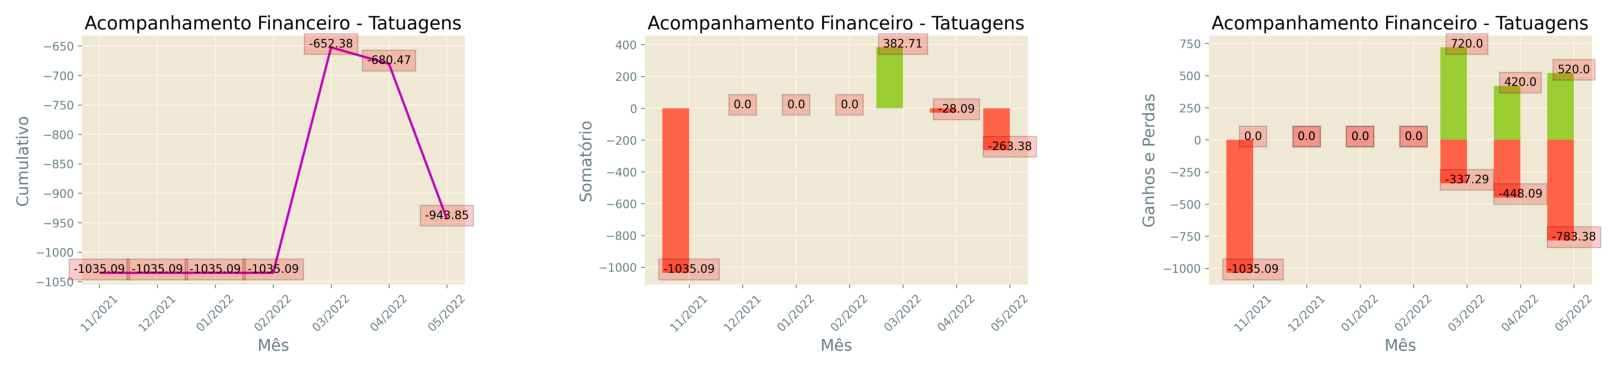

In [13]:
%matplotlib inline
plotagem_graficos()

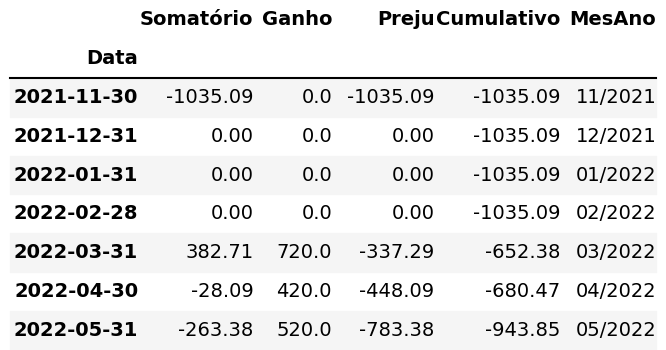

In [14]:
plotagem_tabelas()

In [15]:
(df_resumo_fancy.style
  .background_gradient(cmap=cm, subset=['Somatório','Cumulativo'])
  .hide_index()
  .set_caption('Informações Relevantes - Ganho e Custos da Tattoo')
  .format(precision=2)
  .set_table_styles(styles))

Somatório,Ganho,Preju,Cumulativo,MesAno
-1035.09,0.00,-1035.09,-1035.09,11/2021
0.00,0.00,0.00,-1035.09,12/2021
0.00,0.00,0.00,-1035.09,01/2022
0.00,0.00,0.00,-1035.09,02/2022
382.71,720.00,-337.29,-652.38,03/2022
-28.09,420.00,-448.09,-680.47,04/2022
-263.38,520.00,-783.38,-943.85,05/2022


##**FINALIZAÇÃO DO SCRIPT**

In [16]:
end_script = time.time()
print('Tempo do script {:.2f} segundos'.format((end_script - start_script)))

Tempo do script 9.55 segundos
